In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

from src.energy import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = load_data()
df

,energy
date,
2019-01-01 00:15:00,65900.149402
2019-01-01 00:30:00,64840.326903
2019-01-01 00:45:00,63789.043352
2019-01-01 01:00:00,63138.277485
2019-01-01 01:15:00,62333.139659
...,...
2021-09-22 23:00:00,65398.437088
2021-09-22 23:15:00,63518.449866
2021-09-22 23:30:00,62283.622660


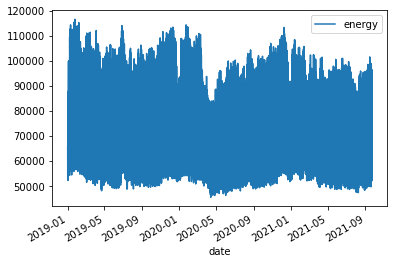

In [5]:
df.plot();